# PHYS 267 - Assignment 4
###### Last Updated: Feb 6, 2023 by Dr. Brenda Lee
***

### Question 1

It is said that normal distributions are 'normal' because they can be found everywhere in Nature. Do some research and present at least 3 different examples of where normal distributions can be found in nature. For each example, do the following:
- Explain the distribution briefly
- Explain what variables are part of the system and why they are random or can be considered random enough for a Gaussian distribution
- Determine whether the distribution can be modeled as a Gaussian distribution without any further manipulation (ie. a Log-Gaussian distribution)

Total Marks: 12

#### Solution

In nature we can see a certain species spread out in an environment pretty randomly. One such example can be coconut dispersals through water bodies. Most coconut trees get spread around by the fruit dispersing through currents of water and via human and animal interferences. So a population or spread of trees in a geiven geographical region could be pretty random. If we are just looking at some spatial density distribution no further manipulation may be needed

IQ of a population. There's a mix of smart and not so smart people in any given population, but very few are too smart or not bright, majority of people are "average" or somewhere in beetween.  The test scores would be random for this reason. Age can probably affect this and perhaps there's other factors too, they can be theor own independent studies as well. Since the distribution is similar to grades not further manipulations would be needed.

Currently working on my 4th year project, we have 2 strains of e-coli growing in a media with 2 antibiotics. Both strains are resistant to one of the antibiotics but the other isn't. We are looking at the population growth measured by colony spread and fluroesence. Some other things are also being modeled (nutrient dependence and such), an error analysis with logarithmic scaling shows some interesting normally distributed correlations with some of the factors that I don't fully understand yet. 
For this question, the spread or co-mutualism of the 2 strain would have to be random, since the 2 bacteria strains are mixed together at same optical densities before plating. 

### Question 2

Use the dataset called A6_DataDistribution.txt. There are 150 values within this dataset. Please do the following:

1. Plot a detailed and labelled frequency histogram of this data. Make sure you provide reasoning behind the number of bins chosen. [4 marks]
2. What kind of distribution is this? What kind of variable is "x": discrete or continuous? [1 mark]
3. Report the four main moments of the distribution. Make sure you print each output separately. What can you tell from the values of skewness and kurtosis? [3 marks]
4. Are there any outliers in this distribution? If so, how many and why? If not, defend your conclusion. Find the relative standing for each outlier, assuming we only want values to lie within two standard deviations of the mean. [4 marks]
5. Assuming your answer to #4 is yes, remove the outliers (in any way you wish; automated or manual) and plot another frequency histogram of the data. Report the four main moments of the distribution again. Have they changed? Explain why they did or did not change after you removed the outliers [4 marks]
6. Standardize your data using your updated dataset from #5 and plot the histogram again. Determine the values for the 1st, 2nd and 3rd quartiles of your standardized distribution. [2 marks]

Total Marks: 18

#### Solution

9 14


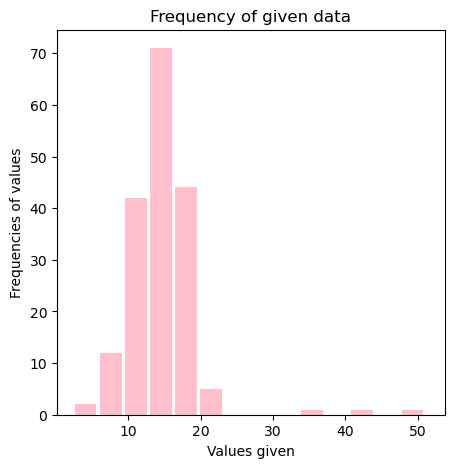

In [43]:
# Part 1 - Plot a Frequency Histogram of Data
from scipy.stats import norm, skew, kurtosis
import matplotlib.pyplot as plt, numpy as np, math as m

data = np.loadtxt("A6_DataDistribution.txt") #import data
b = m.ceil(np.log2(len(data))+1) # bins using Sturges Rule
c= m.ceil(np.sqrt(len(data)))            # bins using sqrt rule
print(b, c)
#histogram
fig, axis = plt.subplots(1,1, figsize =(5,5))
axis.hist(data, bins=c, width=3 , color= 'pink')
plt.title("Frequency of given data")
plt.xlabel("Values given")
plt.ylabel("Frequencies of values")
plt.show()


In [13]:
# Part 2 - Description of Distribution

In [27]:
# Part 3 - Four Main Moments of Distribution
print("Mean:", np.mean(data))
print("Variance:", np.var(data))
print("skew:", skew(data)) 
print("Kurtosis:", kurtosis(data)+3)
# There's a skewness to the right since skew is positive, and since Kurtosis is greater than 3 it is Leptokurtic  (positive excess ends)

Mean: 14.917709497206705
Variance: 24.847368496613715
skew: 3.423521361267708
Kurtosis: 24.492864067788876


In [35]:
# Part 4 - Outliers
stdev = np.std(data)
for x in data:
    z = (x-np.mean(data))/stdev
    if z> 2 or z<-2 : 
        print(x,"is an outlier with a score of:", z)
# there are 4 outliers outside the 2 std range


51.3 is an outlier with a score of: 7.298772664651062
2.6 is an outlier with a score of: -2.4710967926118497
44.28 is an outlier with a score of: 5.89046704678688
34.2 is an outlier with a score of: 3.8682846211357482


9 14


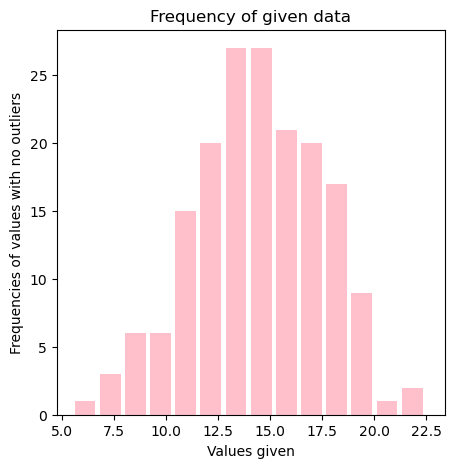

Mean: 14.502228571428573
Variance: 9.760696176326531
skew: -0.136904624806725
Kurtosis: 2.8271560193278282


In [41]:
# Part 5 - Remove Outliers
data2 = np.loadtxt("A6_DataDistribution_Reduced.txt") #import data
b2 = m.ceil(np.log2(len(data2))+1) # bins using Sturges Rule
c2= m.ceil(np.sqrt(len(data2)))            # bins using sqrt rule
print(b2, c2)
#histogram
fig2, axis2 = plt.subplots(1,1, figsize =(5,5))
axis2.hist(data2, bins=c2, width=1 , color= 'pink')
plt.title("Frequency of given data")
plt.xlabel("Values given")
plt.ylabel("Frequencies of values with no outliers")
plt.show()
print("Mean:", np.mean(data2))
print("Variance:", np.var(data2))
print("skew:", skew(data2)) 
print("Kurtosis:", kurtosis(data2)+3)
# skew is now negative meaning left skewed, and Kurtosis is still leptokurtic (positive)

9 14


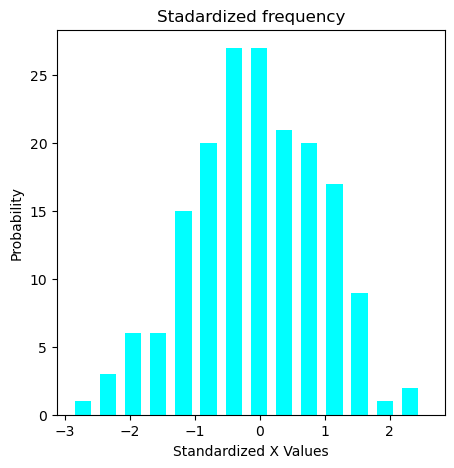

1st Quartile: -0.674489750196082
2nd Quartile: -3.501960626246208e-16
3rd Quartile: 0.6744897501960814


In [53]:
# Part 6 - Standardize the Distribution
from scipy.stats import zscore
sdata= zscore(data2) 
sb = m.ceil(np.log2(len(sdata))+1) # bins using Sturges Rule
sc= m.ceil(np.sqrt(len(sdata)))            # bins using sqrt rule
print(sb,sc)
sfig, saxis = plt.subplots(1,1, figsize=(5,5))
saxis.hist(sdata, bins=sc, width=0.25, color='cyan')
plt.xlabel ("Standardized X Values")
plt.ylabel( "Probability" )
plt.title("Stadardized frequency")
plt.show()

Quart1= np.mean(sdata)+np.std(sdata)*norm.ppf(0.25)
Quart2= np.mean(sdata)+np.std(sdata)*norm.ppf(0.5)
Quart3= np.mean(sdata)+np.std(sdata)*norm.ppf(0.75)
print("1st Quartile:",Quart1)
print("2nd Quartile:",Quart2)
print("3rd Quartile:",Quart3)


### Question 3

We're going to explore the Maxwell-Boltzmann distribution for particle speeds in a homogeneous solution of oxygen (16 atomic mass units). Work on the following questions below:
1. Define a Python function to calculate the speed given a velocity, mass and temperature. Be sure to define the Boltzmann constant as well. [3 marks]
2. For T = 100, 200, 400, 800 K, plot the Maxwell-Boltzmann speed distribution from speeds of 0 to 2000. Make sure you determine a value for mass $m$. What can you conclude from these curves? [6 marks]
3. You are given a dataset of 2000 velocity magnitudes in 3D spherical coordinates (r, phi, theta). Use the dataset called A6_MaxwellBoltzmann.txt and create a function that will return the original speed (magnitude), as well as the x, y, and z components of the speed. You should return 4 values. Note that the dataset does not include phi and theta; you will have to create random angles for each velocity. Use the `np.random.uniform` function to help with this. [4 marks]
4. Generate a histogram for your dataset's x, y or z component **only**, by calling your function from #3. Be sure to label everything. What do you notice about this that's unique? [3 marks]
5. Now, generate a histogram for your speed and find the moments of your distribution. Comment on the skewness and kurtosis. Which of the Maxwell-Boltzmann distributions does your dataset match the most in terms of temperature? [4 marks]

Total Marks: 20 marks

#### Solution

In [62]:
# Part 1 - Python Function
kB = 1.38e-23 

def mbfxn(v, ma, T):
    
    return 4*np.pi*(ma/(2*np.pi*kB*T))**(3/2)*v**2*np.exp(-ma*v**2/(2*kB*T)) 


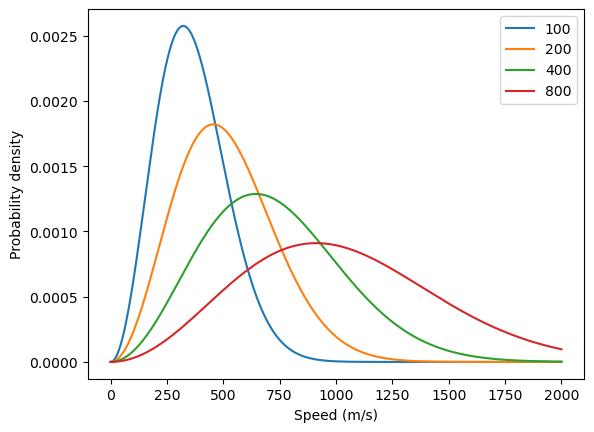

In [68]:
# Part 2 - Plot MB Speed Distribution
o2= 1.66e-27*16  # amu to kg
v = np.linspace(0, 2000, 1000)
fig, axis = plt.subplots()
for T in [100, 200, 400, 800]:
  pv = mbfxn(v, o2, T)
  axis.plot(v,pv)
plt.xlabel('Speed (m/s)')
plt.ylabel('Probability density')
plt.legend([100,200,400,800])
plt.show()

We can see that as temperature increases the probability of finding particles at lower temperature reduces, and shift to right (around higher temp). The distribution is also wider than narrower at higher temperature

In [70]:
# Part 3 - Spherical to Cartesian Coordinates

def S_to_C(r, phi, theta):
    
    x = r*np.sin(theta)*np.cos(phi)
    y = r*np.sin(theta)*np.sin(phi)
    z = r*np.cos(theta)

    return x, y, z

def Velocity(filename):
        # Load the velocity magnitudes from the file
    velocities = np.loadtxt(filename)

    # Create random angles for each velocity
    phi = np.random.uniform(0, 2*np.pi, len(velocities))
    theta = np.arccos(np.random.uniform(-1, 1, len(velocities)))

    # Convert to Cartesian coordinates
    x, y, z = S_to_C(velocities, phi, theta)

    # Calculate the speed
    speed = np.sqrt(x**2+y**2+z**2)

    return speed, x, y, z

Velocity('A6_MaxwellBoltzmann.txt')


(array([242.1500303, 167.2764553, 537.220568 , ..., 714.8909111,
        461.9400516, 213.1731444]),
 array([-142.59790477,  102.28995848, -107.14805904, ..., -495.66991221,
         424.74118043,   68.3405834 ]),
 array([ 144.75452219,  -89.72429088, -526.30033608, ..., -463.58857946,
         170.32583043,  184.19412346]),
 array([ 131.71409581,   97.30225341,  -11.54072665, ..., -224.6463485 ,
          63.02898067,   82.73378414]))

45 12 2000


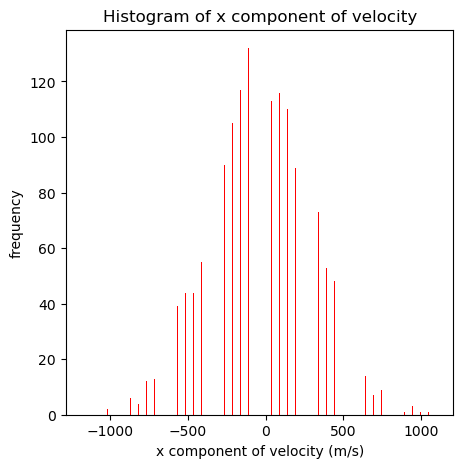

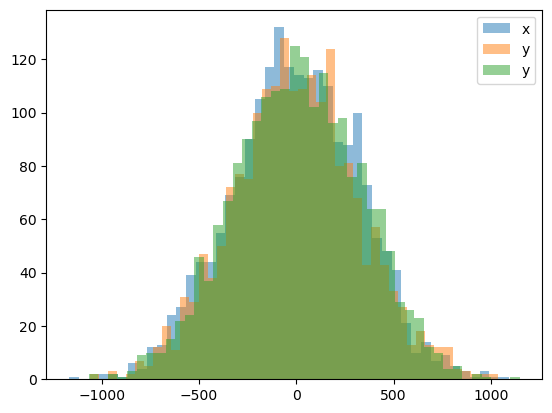

In [102]:
# Part 4 - Histogram for x, y, z Component
speed, x, y, z = Velocity('A6_MaxwellBoltzmann.txt')
xb = m.ceil(np.log2(len(x))+1) # bins using Sturges Rule
xc= m.ceil(np.sqrt(len(x)))            # bins using sqrt rule
print(xc,xb, len(x))

Velfig, Velaxis = plt.subplots(1,1, figsize=(5,5))
Velaxis.hist(x, bins=xc, width=4, color='red')
plt.xlabel('x component of velocity (m/s)')
plt.ylabel('frequency')
plt.title('Histogram of x component of velocity')
plt.show()

plt.hist(x, bins = xc, alpha=0.5, label='x')
plt.hist(y, bins = xc, alpha=0.5, label='y') # since data size is same bin sizes are same as x
plt.hist(z, bins = xc, alpha=0.5, label='z')
plt.legend(loc='upper right')
plt.show()

It's interesting how around 0 some of the x components are missing. This makes some sense since those missing areas are probably part of y or z components. The plot roughly looks 1/3 empty. 1 reason not a lot of information can be seen and it's a very thin data points may be due to incorrect bin sizes. Plotting all 3 together below, we can see that we get a more normal distribution of the velocities.

45 12 2000


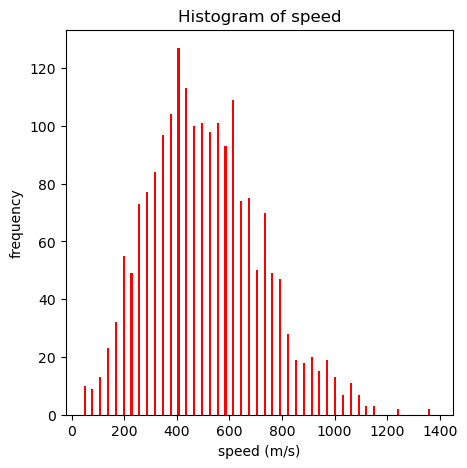

Mean: 519.44549534407
Variance: 45536.21591549727
skew: 0.46444500419387086
Kurtosis: 3.114610757237759


In [121]:
# Part 5 - Moments and Comparison of Speed

xb = m.ceil(np.log2(len(x))+1) # bins using Sturges Rule
xc= m.ceil(np.sqrt(len(x)))            # bins using sqrt rule
print(xc,xb, len(x))

fig2, axis2 = plt.subplots(1,1, figsize=(5,5))
axis2.hist(speed, bins=xc, width=8, color='red')
plt.xlabel('speed (m/s)')
plt.ylabel('frequency')
plt.title('Histogram of speed')
plt.show()

print("Mean:", np.mean(speed))
print("Variance:", np.var(speed))
print("skew:", skew(speed)) 
print("Kurtosis:", kurtosis(speed)+3)

based on above speed distribution and the distribution from earlier part the average speed on the dataset is more in line with 200K plot, since it peaks roughly around 500 m/s and the mean of this distribution is around 519m/s. The skewness is slightly positive perhaps due to small spikes at very high velocities. The Kurtosis is also slightly positive meaning it is leptokurtic. This is both due to slighlt peaks around 700 m/s and also at very high speeds. 